In [7]:
import pandas_datareader.data as pdr
import datetime
import numpy as np

In [3]:
ticker = 'MSFT'
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today()-datetime.timedelta(1825), datetime.date.today())



In [5]:
def MACD(DF,a,b,c):
    df = DF.copy()
    df['MA_Fast'] = df['Adj Close'].ewm(span=12, min_periods = 12).mean()
    df['MA_Slow'] = df['Adj Close'].ewm(span=26, min_periods = 26).mean()
    df['MACD'] = df['MA_Fast'] - df['MA_Slow']
    df['Signal'] = df['MACD'].ewm(span=9, min_periods = 9).mean()
    df.dropna(inplace = True)
    return df





In [6]:
MACD(ohlcv,12,26,9)

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2016-03-01,52.590000,50.919998,50.970001,52.580002,33024500.0,48.325424,47.377013,47.254838,0.122175,0.075716
2016-03-02,52.959999,52.160000,52.410000,52.950001,29289900.0,48.665474,47.575812,47.366909,0.208903,0.105558
2016-03-03,52.970001,51.779999,52.970001,52.349998,24427800.0,48.114029,47.658817,47.425949,0.232869,0.133413
2016-03-04,52.450001,51.709999,52.400002,52.029999,33034200.0,47.819916,47.683653,47.456928,0.226725,0.153452
2016-03-07,51.799999,50.580002,51.560001,51.029999,38407800.0,46.900837,47.563009,47.413399,0.149610,0.152639
...,...,...,...,...,...,...,...,...,...,...
2021-01-04,223.000000,214.809998,222.529999,217.690002,37130100.0,217.690002,220.521885,218.413367,2.108519,2.143305
2021-01-05,218.520004,215.699997,217.259995,217.899994,23823000.0,217.899994,220.118517,218.375339,1.743178,2.063280
2021-01-06,216.490005,211.940002,212.169998,212.250000,35930700.0,212.250000,218.907976,217.921610,0.986366,1.847897


In [6]:
def ATR(DF,n):
    df = DF.copy()
    df['H-l'] = abs(df['High'] - df['Low'])
    df['H-Pc'] = abs(df['High'] -df['Adj Close'].shift(1))
    df['L-Pc'] = abs(df['Low'] -df['Adj Close'].shift(1))
    df['TR'] = df[['H-l','H-Pc','L-Pc']].max(axis =1, skipna = True)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-l','H-Pc','L-Pc'], axis = 1)
    return df2
    

In [20]:
ATR(ohlcv,20)

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2016-01-12,53.099998,52.060001,52.759998,52.779999,36095500.0,48.163425,1.039997,NaN
2016-01-13,54.070000,51.299999,53.799999,51.639999,66883600.0,47.123150,5.906574,NaN
2016-01-14,53.419998,51.570000,52.000000,53.110001,52381900.0,48.464577,6.296848,NaN
2016-01-15,51.970001,50.340000,51.310001,50.990002,71820700.0,46.530006,3.505424,NaN
2016-01-19,51.680000,50.060001,51.480000,50.560001,43564500.0,46.137611,5.149994,NaN
...,...,...,...,...,...,...,...,...
2021-01-04,223.000000,214.809998,222.529999,217.690002,37130100.0,217.690002,8.190002,3.922499
2021-01-05,218.520004,215.699997,217.259995,217.899994,23823000.0,217.899994,2.820007,3.953499
2021-01-06,216.490005,211.940002,212.169998,212.250000,35930700.0,212.250000,5.959991,4.123999


In [27]:
def Bollinger_band(Df,n):
    df = Df.copy()
    df['MA'] = df['Adj Close'].rolling(n).mean()
    df['BB_up'] = df['MA']+ 2*df['MA'].rolling(n).std()
    df['BB_Down'] = df['MA'] -  2*df['MA'].rolling(n).std()
    df['BB_range'] = df['BB_up'] - df['BB_Down']
    df.dropna(inplace = True)
    return df

In [28]:
Bollinger_band(ohlcv,20)

,High,Low,Open,Close,Volume,Adj Close,MA,BB_up,BB_Down,BB_range
Date,,,,,,,,,,
2016-03-08,52.130001,50.599998,50.799999,51.650002,33835100.0,47.470673,47.210578,47.434271,46.986885,0.447386
2016-03-09,52.849998,51.860001,51.889999,52.840000,28251600.0,48.564392,47.390319,47.640130,47.140508,0.499621
2016-03-10,52.939999,51.160000,52.930000,52.049999,38387800.0,47.838306,47.514137,47.822807,47.205466,0.617342
2016-03-11,53.070000,52.380001,53.000000,53.070000,32275700.0,48.775776,47.685740,48.077824,47.293656,0.784169
2016-03-14,53.590000,52.630001,52.709999,53.169998,24083600.0,48.867680,47.824981,48.297966,47.351996,0.945971
...,...,...,...,...,...,...,...,...,...,...
2021-01-04,223.000000,214.809998,222.529999,217.690002,37130100.0,217.690002,218.352999,221.786597,214.919401,6.867196
2021-01-05,218.520004,215.699997,217.259995,217.899994,23823000.0,217.899994,218.529999,222.229958,214.830040,7.399918
2021-01-06,216.490005,211.940002,212.169998,212.250000,35930700.0,212.250000,218.427999,222.283245,214.572753,7.710492


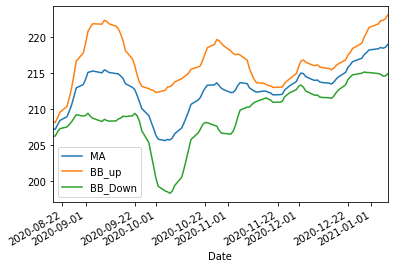

In [33]:
Bollinger_band(ohlcv,20).iloc[-100:,[-4,-3,-2]].plot()

In [8]:
ticker = 'AAPL'
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today()-datetime.timedelta(364), datetime.date.today())



In [36]:
 def RSI(DF,n):
        df = DF.copy()
        df['delta'] = df['Adj Close'] - df['Adj Close'].shift(1)
        df['gain'] = np.where(df['delta']>=0,df['delta'],0)
        df['loss'] = np.where(df['delta']<0,abs(df['delta']),0)
        avg_gain = []
        avg_loss = []
        gain = df['gain'].tolist()
        loss = df['loss'].tolist()
        for i in range(len(df)):
            if i < n:
                avg_gain.append(np.NaN)
                avg_loss.append(np.NaN)
            elif i == n:
                avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
                avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
            elif i > n:
                avg_gain.append(((n-1)*avg_gain[i-1]+ gain[i])/n)
                avg_loss.append(((n-1)*avg_loss[i-1]+ loss[i])/n)
        df['avg_gain'] = np.array(avg_gain)
        df['avg_loss'] = np.array(avg_loss)
        df['RS'] = df['avg_gain'] / df['avg_loss']
        df['RSI'] = 100 - (100/(1+df['RS']))
        return df




In [37]:
RSI(ohlcv,14)

,High,Low,Open,Close,Volume,Adj Close,delta,gain,loss,avg_gain,avg_loss,RS,RSI
Date,,,,,,,,,,,,,
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702,-1.060829,0.000000,1.060829,NaN,NaN,NaN,NaN
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564,-0.332138,0.000000,0.332138,NaN,NaN,NaN,NaN
2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,78.135223,0.966660,0.966660,0.000000,NaN,NaN,NaN,NaN
2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,79.000244,0.865021,0.865021,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,131.009995,1.599991,1.599991,0.000000,1.074532,0.787002,1.365348,57.722920
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.599998,-4.409996,0.000000,4.409996,0.997779,1.045787,0.954094,48.825387
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.919998,4.320000,4.320000,0.000000,1.235081,0.971088,1.271852,55.983053


In [38]:
def ADX(DF,n):
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2

In [39]:
ADX(ohlcv,12)

,High,Low,Open,Close,Volume,Adj Close,TR,DMplus,DMminus,TRn,DMplusN,DMminusN,DIplusN,DIminusN,DIdiff,DIsum,DX,ADX
Date,,,,,,,,,,,,,,,,,,
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531,1.480003,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702,1.349998,0.125000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564,1.487503,0.000000,0.655006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,78.135223,1.756439,0.050003,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,79.000244,1.549774,0.759995,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,131.009995,3.310013,0.000000,0.000000,43.150595,11.611073,10.555014,26.908256,24.460878,2.447379,51.369134,4.764299,24.971229
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.599998,4.670006,0.000000,2.049995,44.224718,10.643483,11.725425,24.066820,26.513284,2.446464,50.580104,4.836811,23.293361
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.919998,5.030006,0.580002,0.000000,45.569331,10.336528,10.748306,22.683081,23.586711,0.903630,46.269792,1.952959,21.514994


In [43]:
def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']


In [44]:
OBV(ohlcv)

/Users/chinnieschibuko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date
2020-01-13            0.0
2020-01-14   -161954400.0
2020-01-15   -283878000.0
2020-01-16   -175048800.0
2020-01-17    -37232400.0
                 ...     
2021-01-05    886331300.0
2021-01-06    731243300.0
2021-01-07    840821500.0
2021-01-08    945786900.0
2021-01-11    851621796.0
Name: obv, Length: 252, dtype: float64

In [45]:
import statsmodels.api as sm

/Users/chinnieschibuko/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/chinnieschibuko/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/chinnieschibuko/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [50]:
def slope(ser,n):
    ser = (ser - ser.min())/(ser.max() - ser.min())
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y_scaled = ser[i-n:i]
        x_scaled = x[:n]
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

ohlcv["close_slope"] = slope(ohlcv["Adj Close"],5)



In [1]:
pip install git+https://github.com/chillaranand/stocktrends


  Cloning https://github.com/chillaranand/stocktrends to /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-req-build-l1uwxuit
  Running command git clone -q https://github.com/chillaranand/stocktrends /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-req-build-l1uwxuit
  Created wheel for stocktrends: filename=stocktrends-0.1.4-cp37-none-any.whl size=5226 sha256=361876f3f7b0ed55c0d2bbfd272e8e654f534c87023823ee11dd2593ba1937f1
  Stored in directory: /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-ephem-wheel-cache-7k8f1p2f/wheels/d1/a6/17/1fe100dc614971113517ec7ae2af9da43163ed375c0a2e4e0f
Successfully built stocktrends
Note: you may need to restart the kernel to use updated packages.


In [3]:
import stocktrends

In [5]:
from stocktrends import Renko

In [9]:
def renko_DF(DF):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df


renko_data = renko_DF(ohlcv)

In [10]:
renko_DF(ohlcv)

,date,open,high,low,close,uptrend
0,2020-01-15,72.0,76.0,72.0,76.0,True
1,2020-01-29,76.0,80.0,76.0,80.0,True
2,2020-02-25,76.0,76.0,72.0,72.0,False
3,2020-02-27,72.0,72.0,68.0,68.0,False
4,2020-03-12,68.0,68.0,64.0,64.0,False
5,2020-03-20,64.0,64.0,60.0,60.0,False
6,2020-03-23,60.0,60.0,56.0,56.0,False
7,2020-03-26,60.0,64.0,60.0,64.0,True
8,2020-04-14,64.0,68.0,64.0,68.0,True
9,2020-04-30,68.0,72.0,68.0,72.0,True


In [12]:
pip install TA-Lib

     |████████████████████████████████| 276kB 3.5MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/chinnieschibuko/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-install-_k3pna4g/TA-Lib/setup.py'"'"'; __file__='"'"'/private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-install-_k3pna4g/TA-Lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-wheel-yxoh0cfe --python-tag cp37
       cwd: /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-install-_k3pna4g/TA-Lib/
  Complete output (29 lines):
  /private/var/folders/xm/qwk05c8n6mb4b359dpy81tt80000gn/T/pip-install-_k3pna4g/TA-Lib/setup.py:71: UserWarning: Cannot find ta-lib library, installation 

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install -i https://pypi.anaconda.org/masdeseiscaracteres/simple ta-lib


Looking in indexes: https://pypi.anaconda.org/masdeseiscaracteres/simple
  ERROR: Could not find a version that satisfies the requirement ta-lib (from versions: none)
ERROR: No matching distribution found for ta-lib
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -i https://pypi.anaconda.org/masdeseiscaracteres/simple ta-lib


Looking in indexes: https://pypi.anaconda.org/masdeseiscaracteres/simple
  ERROR: Could not find a version that satisfies the requirement ta-lib (from versions: none)
ERROR: No matching distribution found for ta-lib
Note: you may need to restart the kernel to use updated packages.


# TA - LIB

In [3]:
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import copy
import talib

In [4]:
talib.get_function_groups() #get a list of talib functions by group 

tickers = ["MSFT","AAPL","FB","AMZN","INTC", "CSCO","VZ","IBM","QCOM","LYFT"]

In [5]:
# Extract OHLCV data for the tickers
ohlc_tech = {} # directory with ohlc value for each stock            
key_path = "D:\\Udemy\\Quantitative Investing Using Python\\1_Getting Data\\AlphaVantage\\key.txt"
ts = TimeSeries(key=open(key_path,'r').read(), output_format='pandas')

attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <=100:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_tech[tickers[i]] = ts.get_daily(symbol=tickers[i], outputsize='full')[0]
            ohlc_tech[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

 
tickers = ohlc_tech.keys() # redefine tickers variable after removing any tickers with corrupted data
ohlc_dict = copy.deepcopy(ohlc_tech) #create a copy of extracted data



FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Udemy\\Quantitative Investing Using Python\\1_Getting Data\\AlphaVantage\\key.txt'

In [6]:
for ticker in tickers:
    # Calculate momentum indicators (e.g. MACD, ADX, RSI etc.) using talib
    ohlc_dict[ticker]["ADX"] = talib.ADX(ohlc_dict[ticker]["High"],
                                        ohlc_dict[ticker]["Low"],
                                        ohlc_dict[ticker]["Adj Close"],
                                        timeperiod=14)
    # Identify chart patterns (e.g. two crows, three crows, three inside, engulging pattern etc.)
    ohlc_dict[ticker]["3I"] = talib.CDL3WHITESOLDIERS(ohlc_dict[ticker]["Open"],
                                                 ohlc_dict[ticker]["High"],
                                                 ohlc_dict[ticker]["Low"],
                                                 ohlc_dict[ticker]["Adj Close"])
    
    # Statistical functions (e.g. beta, correlation etc.)
    ohlc_dict[ticker]["Beta"] = talib.BETA(ohlc_dict[ticker]["High"],
                                         ohlc_dict[ticker]["Low"],
                                         timeperiod=14)


NameError: name 'ohlc_dict' is not defined